In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel("MS.xlsx")
data.head()

,Compound,Al,B,Ba,Ce,Co,Dy,Er,Fe,Gd,...,Pr,Pt,Sm,Sr,Tb,Th,Tm,Y,Yb,Ms
0,BaFe12O19,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.033
1,Ce2Fe14B,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,23.900
2,CoFe2O4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7.040
3,CoPt,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12.570
4,Dy2Fe14B,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,14.000


In [3]:
x=data.drop(['Compound','Ms'],axis=1)
y=data['Ms']

In [5]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Al,B,Ba,Ce,Co,Dy,Er,Fe,Gd,Ho,...,Pd,Pr,Pt,Sm,Sr,Tb,Th,Tm,Y,Yb
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=50)

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
input_layer =keras.Input(shape=(len(x_train.columns),))
model.add(input_layer)
model.add(Dense(60,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(1,activation='linear'))

In [25]:
model.compile( loss='mse',optimizer='Adam', metrics=['mse','mae',])

In [26]:
model.fit(x_train,y_train,epochs=100,batch_size=5)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2836.8130 - mae: 33.4019 - mse: 2872.4609
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3398.8779 - mae: 32.5577 - mse: 3431.5156 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3696.1694 - mae: 36.8781 - mse: 3730.0891 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1742.4998 - mae: 27.4725 - mse: 1537.9600 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2453.9075 - mae: 29.4539 - mse: 2489.0046
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1773.6169 - mae: 24.9198 - mse: 1773.4760
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1690.5270 - mae: 25.5370 - mse: 1727.8762 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1199.7042 - mae: 18.9350 - mse: 1012.3748
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2022.8834 - mae: 22.4046 - mse: 2046.7042
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1500.2153 - mae: 21.5975 - mse: 1531.3979 
Epoc

In [27]:
_, mse, mae = model.evaluate(x_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 728.9333 - mae: 22.5760 - mse: 728.9333
Mean Squared Error: 22.5760
Mean Absolute Error: 728.9333


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


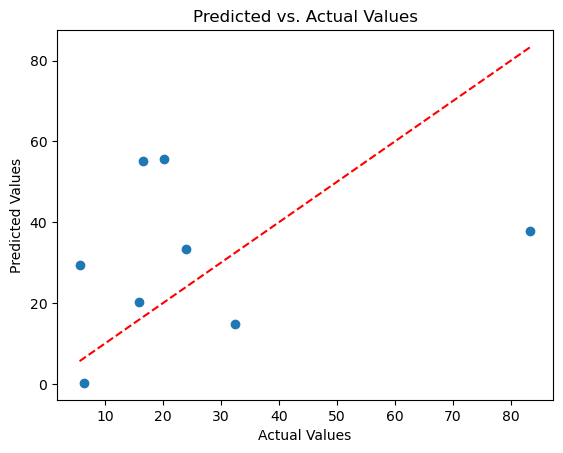

In [28]:
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.show()